In [1]:
from wordle_modeller import wordle_solver

import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

import pandas as pd
import numpy as np

sns.set_theme(style="darkgrid")
sns.color_palette()
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
g = wordle_solver(dict_file = 'full_five_letters_words.txt')

In [3]:
r1 = g.solve_many(use_smart=False, N_GAMES=1000, exclude=0)

In [4]:
r2 = g.solve_many(use_smart=True, N_GAMES=1000, exclude=0)

In [5]:
r3 = g.solve_many(use_smart=True, N_GAMES=1000, exclude=1)

In [6]:
r4 = g.solve_many(use_smart=True, N_GAMES=1000, exclude=2)

In [7]:
df1 = pd.DataFrame(data=r1['profile'])
df1.index.name = 'game'
df1.columns = ['success']
df1['use_smart'] = False
df1['exclude'] = 0
df1['strategy'] = 'No smart start, no exclusion'

In [8]:
df2 = pd.DataFrame(data=r2['profile'])
df2.index.name = 'game'
df2.columns = ['success']
df2['use_smart'] = True
df2['exclude'] = 0
df2['strategy'] = 'Smart start, no exclusion'

In [9]:
df3 = pd.DataFrame(data=r3['profile'])
df3.index.name = 'game'
df3.columns = ['success']
df3['use_smart'] = True
df3['exclude'] = 1
df3['strategy'] = 'Smart start, 1 exclusion'

In [10]:
df4 = pd.DataFrame(data=r4['profile'])
df4.index.name = 'game'
df4.columns = ['success']
df4['use_smart'] = True
df4['exclude'] = 2
df4['strategy'] = 'Smart start, 2 exclusions'

In [11]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,success,use_smart,exclude,strategy
0,5,False,0,"No smart start, no exclusion"
1,5,False,0,"No smart start, no exclusion"
2,5,False,0,"No smart start, no exclusion"
3,3,False,0,"No smart start, no exclusion"
4,2,False,0,"No smart start, no exclusion"
...,...,...,...,...
3995,5,True,2,"Smart start, 2 exclusions"
3996,4,True,2,"Smart start, 2 exclusions"
3997,4,True,2,"Smart start, 2 exclusions"
3998,7,True,2,"Smart start, 2 exclusions"


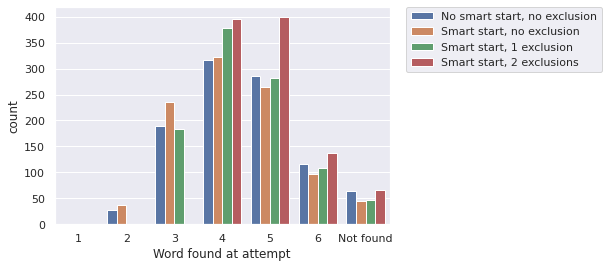

In [13]:
p = sns.countplot(data=df, x='success', hue='strategy')
p.set_xticklabels([1, 2, 3, 4, 5, 6, 'Not found'])
p.set_xlabel("Word found at attempt")

# Put the legend out of the figure
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
r1['success_rate'], r2['success_rate'], r3['success_rate'], r4['success_rate']

(0.936, 0.955, 0.954, 0.933)

In [15]:
f = g.analyse_frequency()
df1 = pd.DataFrame.from_dict(f, orient='index', columns=['frequency'])
df1.index.name = 'letter'
df1.sort_values(by=['frequency'], ascending=False)

,frequency
letter,
E,1857
S,1501
A,1475
R,1205
O,1138
L,990
T,961
I,957
N,781


<AxesSubplot:title={'center':'Frequency of letters in all the five letters words'}, xlabel='letter'>

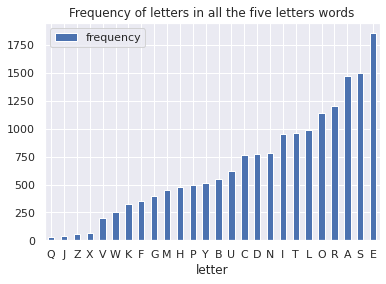

In [16]:
df1.plot(kind="bar", rot=0, title='Frequency of letters in all the five letters words')

In [17]:
g.frequency_rank(limit=20)

['AROSE',
 'LASER',
 'EARLS',
 'TEARS',
 'ASTER',
 'RATES',
 'STARE',
 'RAISE',
 'ARISE',
 'ALOES',
 'SNARE',
 'EARNS',
 'SANER',
 'DARES',
 'READS',
 'DEARS',
 'ACRES',
 'CARES',
 'SCARE',
 'RACES']